IN this notebook, we improve our baseline model by handling class imbalance and other analysis. In previous sections, we built few baseline models and Random Forest was the best performer. We shall imporve this model by handling class imbalance and hyperparameter tuning.

In [2]:
print('hello')

hello


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

import pickle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, validation_curve, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.plotting import plot_confusion_matrix


import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [59]:
data = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print("shape: ", data.shape)
pd.set_option("display.max_columns",None)
data

shape:  (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


The data set includes information about:  

<li>Customers who left within the last month – the column is called Churn</li>
<li>Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies</li>
<li>Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges</li>
<li>Demographic info about customers – gender, age range, and if they have partners and dependents</li>


**CustomerID**: A unique ID that identifies each customer.  
**Gender**: The customer’s gender: Male, Female  
**Age**: The customer’s current age, in years, at the time the fiscal quarter ended.  
**SeniorCitizen**: Indicates if the customer is 65 or older: Yes, No  
**Partner**: Indicates if the customer is married: Yes, No  
**Dependents**: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.  
**Tenure**: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.  
**PhoneService**: Indicates if the customer subscribes to home phone service with the company: Yes, No  
**MultipleLines**: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No, No phone service  
**InternetService**: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.  
**OnlineSecurity**: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No, No internet service  
**OnlineBackup**: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No, No internet service  
**DeviceProtection**: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No, No internet Service  
**TechSupport**: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No, No internet service  
**StreamingTV**: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.  
**StreamingMovies**: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.  
**Contract**: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.  
**PaperlessBilling**: Indicates if the customer has chosen paperless billing: Yes, No
**PaymentMethod**: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Chec**k  
MonthlyCharge**: Indicates the customer’s current total monthly charge for all their services from the company.  
**TotalCharges**: Indicates the customer’s total charges, calculated to the end of the quarter specified above.  

so no null values are present

In [6]:
data.info()           # information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
data.describe()          # viewing simple discriptive stratistics 

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


nothing looks odd.

In [11]:
data['SeniorCitizen'] = pd.Categorical(data['SeniorCitizen'])

In [12]:
data[data['TotalCharges']==" "]     # ater some analysis, found that there was actually few empty input for this column

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
data['TotalCharges'] = data['TotalCharges'].replace(r'\s+', np.nan, regex=True)  # replace those empty inputs with nan values
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
data['SeniorCitizen'] = pd.Categorical(data['SeniorCitizen']) # senior citizen was in numeric type but it is actually a categorical 
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')   # TotalCharges column was in object type. we converted it to numerics
mean = data['TotalCharges'].mean() 
median = data['TotalCharges'].median()

In [15]:
mean, median

(2283.3004408418656, 1397.475)

In [16]:
data['TotalCharges'] = data['TotalCharges'].fillna(mean)  # we will fill those nan values by mean

In [17]:
#data = data.replace(r'\s+', np.nan, regex=True)

In [18]:
total = data.isna().sum().sort_values(ascending=False)
percent = (data.isna().sum()/data.isna().count()).sort_values(ascending=False)
missing_values = pd.concat([total,percent], axis=1, keys=['Total','Percent'])
missing_values

,Total,Percent
customerID,0,0.0
DeviceProtection,0,0.0
TotalCharges,0,0.0
MonthlyCharges,0,0.0
PaymentMethod,0,0.0
PaperlessBilling,0,0.0
Contract,0,0.0
StreamingMovies,0,0.0
StreamingTV,0,0.0
TechSupport,0,0.0


In [19]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [20]:
# column Churn is our target feature. It was in categorical form.we will encode them below with binary values.
encoder = LabelEncoder()
data['Churn'] = encoder.fit_transform(data['Churn'])

In [21]:
data.Churn.unique()

array([0, 1])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

In [23]:
categ_features = [feature for feature in data.columns if data[feature].dtype == 'O']
print('Number of categorical features:', len(categ_features))
print(categ_features)

Number of categorical features: 16
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [24]:
num_features = [feature for feature in data.columns if data[feature].dtype != 'O']
print('Number of categorical features:', len(num_features))
print(num_features)

Number of categorical features: 5
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [25]:
categ_features.append('SeniorCitizen') 
categ_features.remove('customerID')
num_features.remove('SeniorCitizen')
num_features.remove('Churn')

In [26]:
num_features

['tenure', 'MonthlyCharges', 'TotalCharges']

## 3. Data visualization of discriptic statistics  
Before we start modeling, let's some EDA of our data.  

Let's first examine the distribution of our target variable.

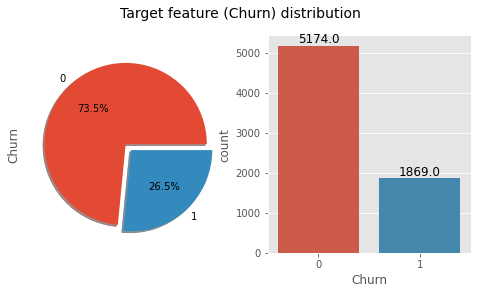

In [27]:
plt.figure(figsize=(8,4))
plt.suptitle("Target feature (Churn) distribution", fontsize=14)
plt.subplot(121)
data['Churn'].value_counts().plot.pie(explode=[0,0.1], shadow=True, autopct='%1.1f%%')
plt.subplot(122)
sns.countplot(data['Churn'])
for i, val in enumerate(data['Churn'].value_counts()):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment = 'bottom', fontdict = {'fontweight':500, 'size':12})

Roughly quarter of our sample are no longer customers.  
We see some class imbalacne. we will handle this imbalnce later in this notebook.

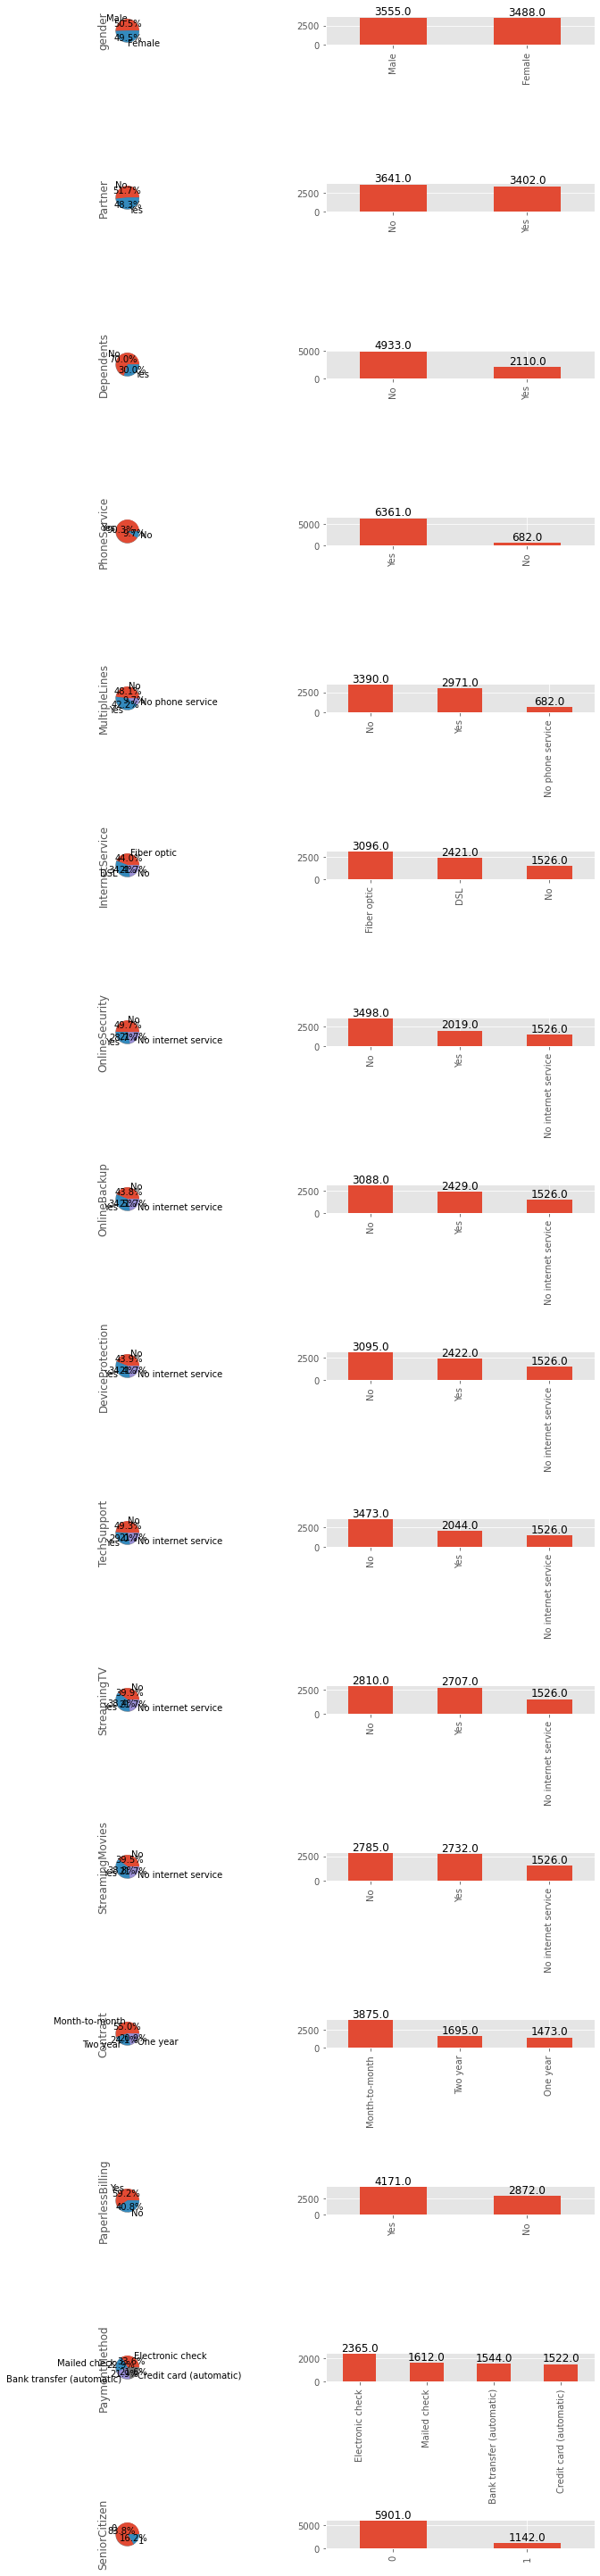

In [28]:
# lets look at ehe distribution of each categorical values
plt.figure(figsize=(10,40))
count=1
for feature in categ_features:
    plt.subplot(16,2,count)
    data[feature].value_counts().plot.pie(shadow=True, autopct='%1.1f%%')
    count += 1
    plt.subplot(16,2,count)
    #sns.countplot(data[feature])
    data[feature].value_counts().plot(kind='bar')
    for i, val in enumerate(data[feature].value_counts()):
        plt.text(i, val, float(val), horizontalalignment='center', verticalalignment = 'bottom', fontdict = {'fontweight':500, 'size':12})
    count += 1
plt.tight_layout()
plt.show()

The plots above are sef-explanatory. They shows the distribution of each categorical variables.

In [29]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

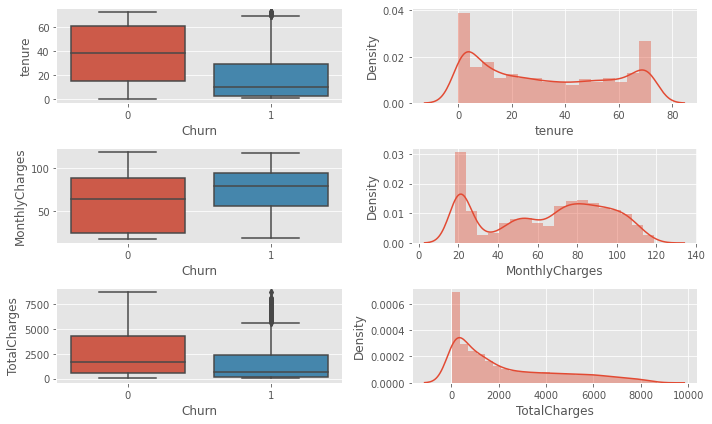

In [30]:
# lets see the distribution of each numerical features and aslo wuth respect to class variable(Churn)
plt.figure(figsize=(10,6))
count=1
for feature in num_features:
    plt.subplot(3,2,count)
    sns.boxplot(data['Churn'], data[feature])
    count += 1
    plt.subplot(3,2,count)
    sns.distplot(data[feature])
    count += 1
plt.tight_layout()
plt.show()

<ul>
    <li>Tenure: Customers who have been with the company for less months by the quarter have high churn rate. Also we see that the <i>tenure</i> variable is stacked at the tail, so the large proportion of customers have either been had the shortest (1 month) or longest (72 months) tenure.</li>
    <li>MOnthlyCharges: Customers with high monthly charge in average have high churn rate. It aslo seem as if <i>MonthlyCharges</i> variable is normally distributed around dollar 80  with large stack near lower rates</li>
    <li>TotalCharges: Customers who have low total charge in average have high churn rate. This variable is also positively skewed with large stack at lower reates.</li>
</ul>

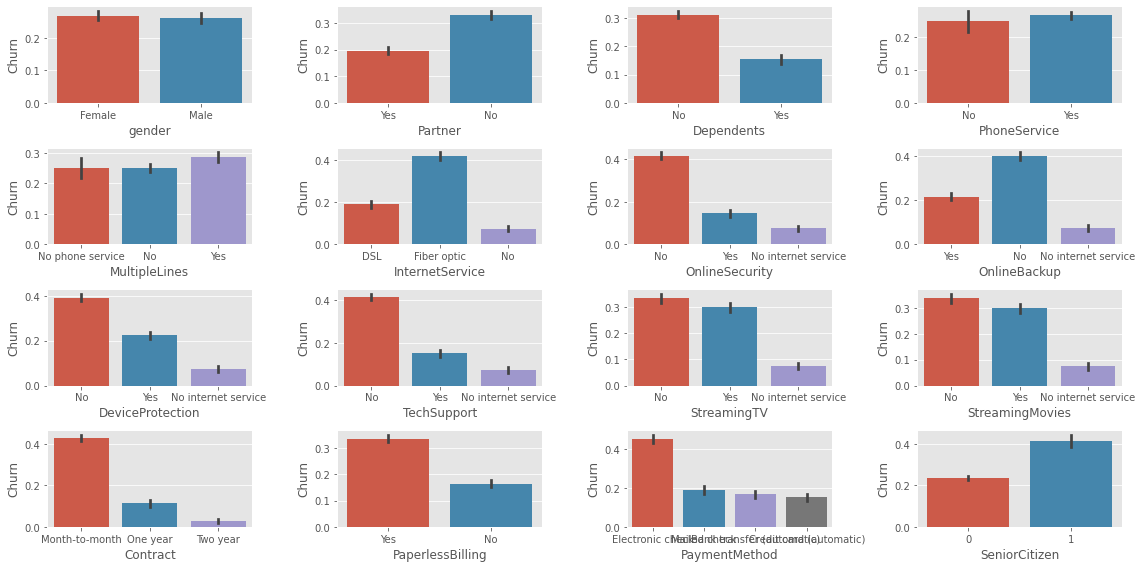

In [31]:
plt.figure(figsize=(16,8))
count = 1
for feature in categ_features:
    plt.subplot(4, 4, count)
    sns.barplot(data[feature],data['Churn'])
    count += 1
plt.tight_layout()
plt.show()
    

<ul>
    <li>gender: gender of customers have no significant affect on Churn event.</li>
    <li>Partner: customers without partners seems have high churn.</li>
    <li>Dependents: customers without dependents seems to have high Churn events.</li>
    <li>PhoneService: wheather customers signed up for home phone services or not doesnot seems to affect Churn event that much though those who have subscribed have slighlty high Churn in average.</li>
    <li>MultipleLines: customers who have singed up for services from multiple lines in average have slightly higher churn event than those who did not.</li>
    <li>InternetService: In average, about 44% of customers who have subscribed for internet for Fiber Optics have churn events. Similiarly, in average, about 18% customers who have used DSL for internet service have churn event. And about 7-8 % of customers who have not signed up for internet service have churn event. So, in average, customers who have subscribed internet with Fiber Optics have high churn rate</li>
    <li>OnlineSecurity: In average, customers who have not signed up for additional online security services have high churn rate.</li>
    <li>OnlineBackup: Customers eho have not subscribed for online backup have high churn (~40% in average). And around 22% Customers who have not subscribed of online backup have churn event in average. Around 8% custoemrs in average with no internet service have churn event.</li>
    <li>DeviceProtection: In average, customers who have not subscribed for additional device protection plan for their internet equipments with the company have high churn rate.<li>
    <li>TechSupport: Customers who have not signed up for tech support have higher churn event (~43%) than the customers who have  signed up (~15%).</li>
    <li>StreamingTV: Customers who uses internet for streaming TV showss have slightly higher Churn event (~35% in average) than those who have (~30% in average).</li>
    <li>StreamingMovies: About 35% of Customers in average who have not signed up for movies streaming service have churn event while about 30% of customers in average who have singed up for this service have churn rate. Around 17 % of customers in average who haved churned had no internet service for streaming</li>
    <li>Contract: Around 45% of customers who have contract term of less than one year (i.e. month-to-month) have churn event in average in contrast to around 12% of customers with one year contract and around 4% of customers with 2 years contract term. So it means lower the contract periods/term higher the chances of churn.</li>
    <li>PaperlessBilling: Around 35% of customers in average who had paperless billing service have churn event in contrast to  around 16% of customers kn average without paperless biling.</li>
    <li>PaymentMethod: Customers with payment method of electronic check have high churn event in average. While ohter methods don't have significant difference in churn event.</li>
    <li>SeniorCitizen: Customers who are senior citizens have higher chum rate in average than those who aren't.</li>
</ul>

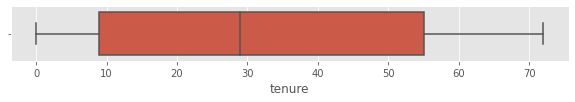

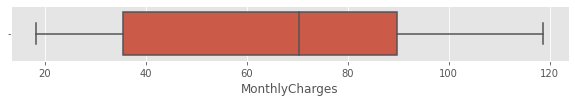

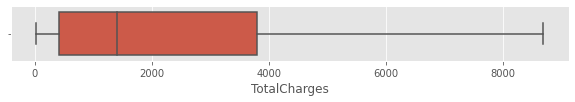

In [32]:
for feature in num_features:
    plt.figure(figsize=(10,1))
    sns.boxplot(data[feature])

### Feature Engineering

In [33]:
data = data.drop('customerID', axis=1)   # customerID column have no importance for our analysis. Lets delete it.

In [34]:
df = data.copy()

In [35]:
# now we shall onehot encode all the categorical features 
data = pd.get_dummies(data, drop_first=True)    # drop_first=True is sone to avoide dummy variable trap
data.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [36]:
data.shape

(7043, 31)

In [37]:
data_new = data.copy()

In [38]:
data = data_new.copy()

#### 4.1 overampling method to handle class imbalance  
We shao now handle class imbalance seen above. Over-sampling is the process of randomly duplicating observations from the minority class making it proportiate to majority class.  
**Approach**: we will first separate data into majority class and minority class and than we will oversample the minority class observation with replacement. and then we will combine majority class observation and oversampled minority class observation. Thats it.

In [39]:
data['Churn'].value_counts()     # class distribution before oversampling

0    5174
1    1869
Name: Churn, dtype: int64

In [40]:
from sklearn.utils import resample

# separate the maority and minority class observation
data_major = data[data['Churn'] == 0]
data_minor = data[data['Churn'] == 1]

# over-sample the minority class observations
data_minor_oversample = resample(data_minor, replace = True, n_samples=data_major.shape[0], random_state = 0)

# finally combine the majority class observation and oversampled minoiry class observation
data = pd.concat([data_major, data_minor_oversample])

In [41]:
data.Churn.value_counts()  # class distribution after oversampling

0    5174
1    5174
Name: Churn, dtype: int64

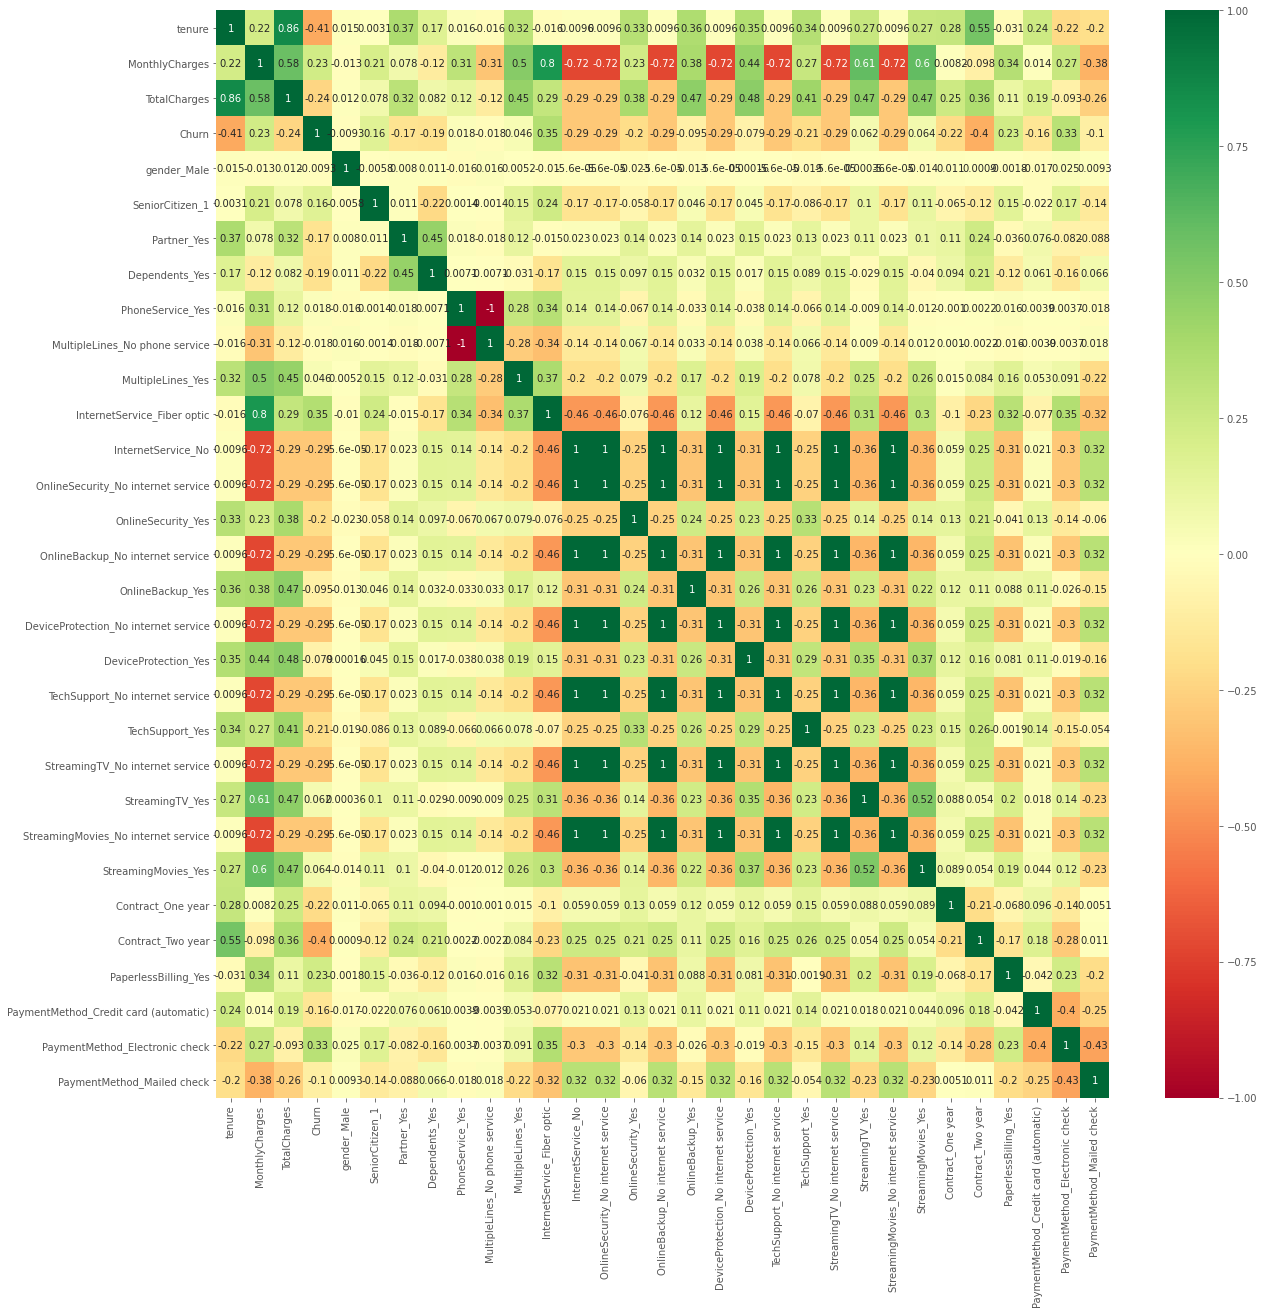

In [42]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [43]:
# separateing dependent(Churn) and independent features
X = data[data.loc[:,data.columns != 'Churn'].columns]
Y = data['Churn']


### Feature Selection using Mutual Information

In [44]:
importances = mutual_info_classif(X,Y)

<AxesSubplot:>

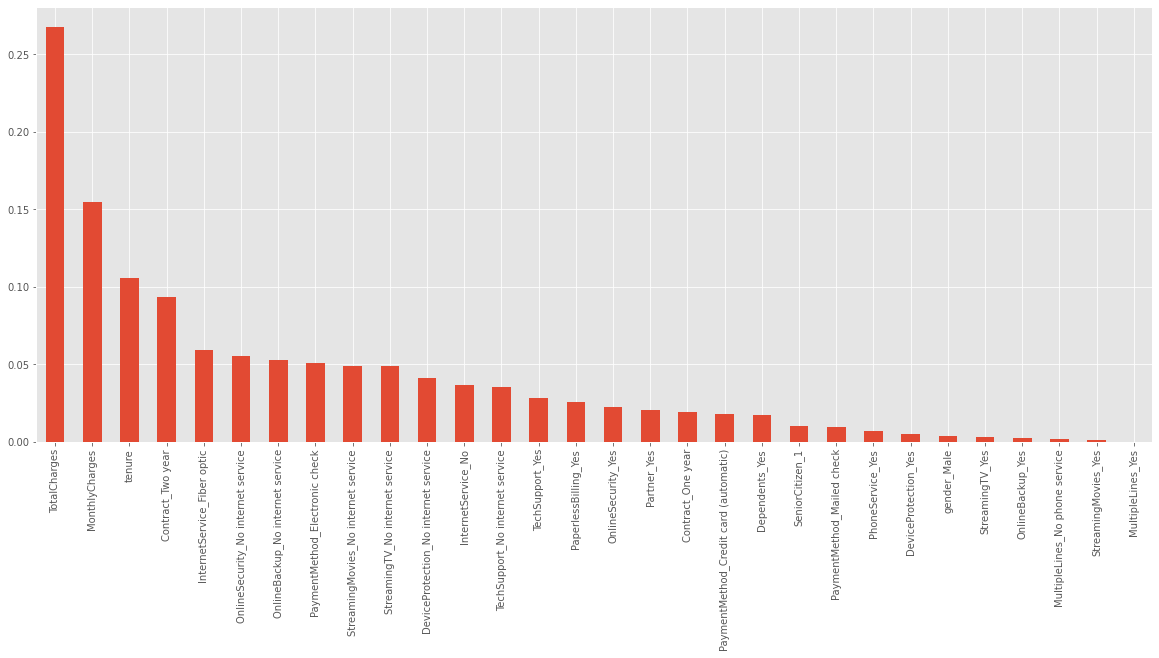

In [45]:
mutual_info = pd.Series(importances)
mutual_info.index = X.columns
#mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [47]:

sel_imp_cols = SelectKBest(mutual_info_classif, k=8)
sel_imp_cols.fit(X,Y)
imp_features = X.columns[sel_imp_cols.get_support()]
imp_features

Index(['tenure', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'OnlineSecurity_No internet service',
       'StreamingMovies_No internet service', 'Contract_Two year',
       'PaymentMethod_Electronic check'],
      dtype='object')

In [48]:
X = X[list(imp_features)] # Now we will only take these important feature as our predictor variables

In [49]:
# now lets split data into train and test vectors
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [50]:
x_train.head()

,tenure,MonthlyCharges,TotalCharges,InternetService_Fiber optic,OnlineSecurity_No internet service,StreamingMovies_No internet service,Contract_Two year,PaymentMethod_Electronic check
3448,4,61.45,229.55,0,0,0,0,0
3360,13,83.20,1060.60,1,0,0,0,1
3862,70,25.40,1782.05,0,1,1,1,0
5996,62,19.85,1253.65,0,1,1,1,0
344,41,20.25,865.00,0,1,1,0,0


In [51]:
y_train

3448    1
3360    1
3862    0
5996    0
344     0
       ..
3933    0
6971    1
1226    0
1211    1
315     0
Name: Churn, Length: 8278, dtype: int32

### 5 Model Building
Tere are a lot of categorical features. So a tree based classifiers like Random Forest, Decision Tree performs better

In [52]:
logreg = LogisticRegression()
svm = SVC()
rf = RandomForestClassifier()
nb = GaussianNB()
knn = KNeighborsClassifier()
d_tree = DecisionTreeClassifier()

accuracies = {}
CV_scores = {}
def Execute(model):
    model = model
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Model score: ", model.score(x_train,y_train))
    print('Test Score: ', accuracy_score(y_test,y_pred))
    scores = cross_val_score(model, x_train, y_train, cv=10)
    print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
    print('\nAUC score: ', metrics.roc_auc_score(y_test,y_pred))
    accuracies[model] = accuracy_score(y_test,y_pred)
    CV_scores[model] = scores
    print('\nClassification report:\n', classification_report(y_test,y_pred))
    # CREATING THE CONFUSION MATRIX
    fig, ax = plot_confusion_matrix(conf_mat = confusion_matrix(y_test,y_pred),
                                colorbar = True,
                                show_absolute = False,
                                show_normed = True,
                                figsize = (3,3))
    plt.title("confusion matrix", fontsize=14)
    plt.show()
    return model

Model score:  0.9929934766851897
Test Score:  0.8782608695652174
CV accuracy: 0.874 +/- 0.009

AUC score:  0.8789967405177639

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87      1049
           1       0.84      0.93      0.88      1021

    accuracy                           0.88      2070
   macro avg       0.88      0.88      0.88      2070
weighted avg       0.88      0.88      0.88      2070



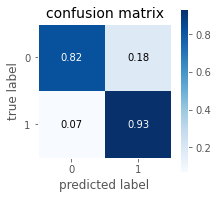

In [54]:
rf_clf = Execute(rf)             # train Random Forest Classifier
with open('saved_models/randomforest.pkl', 'wb') as file:
    pickle.dump(rf_clf,file)

Pretty decent result obtained

Model score:  0.9929934766851897
Test Score:  0.8599033816425121
CV accuracy: 0.866 +/- 0.008

AUC score:  0.8606097500627902

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.81      0.85      1049
           1       0.82      0.91      0.87      1021

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



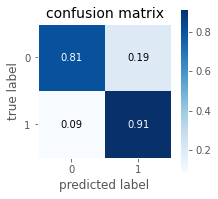

DecisionTreeClassifier()

In [55]:
Execute(d_tree)

In [56]:
#Randomized Search CV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]   # Number of trees in random forest
max_features = ['auto', 'sqrt']                                            # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]                   # Maximum number of levels in tree
# max_depth.append(None)
min_samples_split = [2, 5, 10, 15, 100]                             # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 5, 10, 15]                            # Minimum number of samples required at each leaf node

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10, 15]}


In [57]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   6.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   6.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   6.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   7.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   8.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   4.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   4.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, 

[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  15.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  13.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  13.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  12.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=300; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=300; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=300; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=300; total time=   2.5s
[CV] END max_depth=1

[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=  10.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=  10.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   7.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   7.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   7.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   7.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   7.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  12.5s
[CV] END max_depth=20, max_features=s

[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   6.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   6.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   7.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   6.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   6.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   3.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   3.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   4.3s
[CV] END max_depth=30, m

[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  14.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  13.6s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  12.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=300; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=300; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=300; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=300; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=300; total time=   2.5s
[CV] END max_depth=

[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=  10.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   7.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   7.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   7.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   7.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   7.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  12.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  13.7s
[CV] END max_depth=20, max_features=s

[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   6.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   6.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   6.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   6.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   4.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   4.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   3.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   3.9s
[CV] END max_depth=30, m

[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  12.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  12.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=300; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=300; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=300; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=300; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=300; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   3.8s
[CV] END max_depth=1

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   9.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   8.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   8.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   8.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=  10.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  13.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  14.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  14.1s
[CV] END max_depth=20, max_features=s

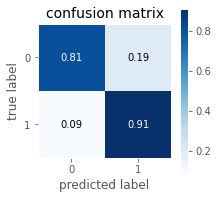

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10, 15],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [58]:
Execute(rf_random)

In [62]:
accuracies

{LogisticRegression(): 0.7657004830917874,
 RandomForestClassifier(): 0.8971014492753623,
 GaussianNB(): 0.7347826086956522,
 KNeighborsClassifier(): 0.7521739130434782,
 DecisionTreeClassifier(): 0.8729468599033816,
 RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                    param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [1, 2, 5, 10, 15],
                                         'min_samples_split': [2, 5, 10, 15,
                                                               100],
                                         'n_estimators': [100, 200, 300, 400,
                                                          500, 600, 700, 800,
                                                          900, 1000, 1100,
                                                          1200]},
                    random_state=4

In [63]:
CV_scores

{LogisticRegression(): array([0.75845411, 0.77173913, 0.76328502, 0.78381643, 0.75724638,
        0.76811594, 0.75845411, 0.75241546, 0.75937122, 0.78476421]),
 RandomForestClassifier(): array([0.88405797, 0.88768116, 0.90821256, 0.90821256, 0.87681159,
        0.89492754, 0.87801932, 0.89130435, 0.89117291, 0.89359129]),
 GaussianNB(): array([0.71376812, 0.75241546, 0.73671498, 0.73913043, 0.70531401,
        0.7173913 , 0.71256039, 0.72826087, 0.73155985, 0.73639661]),
 KNeighborsClassifier(): array([0.76690821, 0.74637681, 0.74033816, 0.77173913, 0.74396135,
        0.74154589, 0.76690821, 0.71497585, 0.75937122, 0.76904474]),
 DecisionTreeClassifier(): array([0.84661836, 0.852657  , 0.87318841, 0.88164251, 0.85628019,
        0.86111111, 0.85507246, 0.85386473, 0.85006046, 0.84038694]),
 RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                    param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                         'max_f